                                                text label
0  ﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...   ham
1  ﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...   ham
2  ﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...   ham
3  ﻿با سلام  و احترام\nضمن تقدیر از مسولین محترم ...   ham
4  ﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...   ham
Class Distribution:
label
ham     500
spam    500
Name: count, dtype: int64


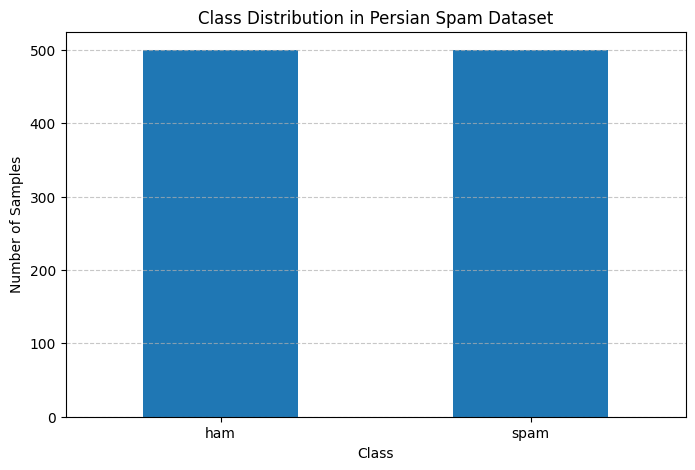

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace the file path with the path to your dataset
file_path = '/kaggle/input/persian-spam-email/emails.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Analyze the dataset
# Check the unique classes in the 'label' column
class_distribution = data['label'].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Visualize class distribution using a bar chart
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', rot=0)
plt.title("Class Distribution in Persian Spam Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(ticks=range(len(class_distribution.index)), labels=class_distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [2]:
!pip install hazm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 17.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 96.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.7 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9297 sha256=6b6adaf166cdf94e970997ed632e160bebe24a9c08cca59fb168047446c9b445
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2

In [3]:
# Import necessary libraries
import re
from hazm import Normalizer, word_tokenize, stopwords_list

# # Load the dataset
# file_path = '../input/persian-spam-email/dataset.csv'
# data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Preprocessing steps
def preprocess_text(text):
    normalizer = Normalizer()  # Initialize the Hazm normalizer
    
    # Normalize the text
    text = normalizer.normalize(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove long numbers or phone numbers
    text = re.sub(r'\b\d{7,}\b', '', text)
    
    # Reduce repeated characters to a single instance
    text = re.sub(r'(.)\1+', r'\1', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords_list())
    tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin tokens to reconstruct the cleaned text
    return ' '.join(tokens)

# Apply preprocessing to the text column
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Display the cleaned dataset
print(data[['text', 'cleaned_text']].head())

# Save the cleaned dataset for further use
data.to_csv('cleaned_dataset.csv', index=False)


                                                text label
0  ﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...   ham
1  ﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...   ham
2  ﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...   ham
3  ﻿با سلام  و احترام\nضمن تقدیر از مسولین محترم ...   ham
4  ﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...   ham
                                                text  \
0  ﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...   
1  ﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...   
2  ﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...   
3  ﻿با سلام  و احترام\nضمن تقدیر از مسولین محترم ...   
4  ﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...   

                                        cleaned_text  
0  ﻿منون آقا سامان . پارسال اصلا آزاد شرکت نکرده_...  
1  ﻿سلام کریمی بالاخره آزمونارشد تموم راحت شدم یک...  
2  ﻿درود حاج وحیدی بنده بعنوان دکتری تاریخ دستی ت...  
3  ﻿با سلام احترام تقدیر مسولین محترم سایت تابناک...  
4  ﻿با سلام اینجانب دستگاه خودرو پ

In [4]:
# data.to_csv('/kaggle/working/cleaned_dataset.csv', index=False)

In [33]:
# # Install Hugging Face's Transformers library if not already installed
# !pip install transformers

import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA

# Load the dataset (assuming it's cleaned)
file_path = './cleaned_dataset.csv'  # Adjust based on your setup
data = pd.read_csv(file_path)

# Load ParsBERT model and tokenizer
model_name = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to tokenize and extract embeddings
def extract_embeddings(texts, model, tokenizer, max_length=64):
    # Tokenize and pad sequences
    encoded_input = tokenizer(
        texts.tolist(), 
        padding=True, 
        truncation=True, 
        max_length=max_length, 
        return_tensors="pt"
    )
    
    # Extract embeddings from ParsBERT
    with torch.no_grad():
        output = model(**encoded_input)
    
    # Use the CLS token's embedding (first token) as the sentence embedding
    embeddings = output.last_hidden_state[:, 0, :].numpy()
    return embeddings

# Apply ParsBERT embedding extraction
texts = data['cleaned_text']  # Replace with your column containing text
embeddings = extract_embeddings(texts, model, tokenizer)

# Reduce embedding dimensions to 120 using PCA
pca = PCA(n_components=120)
reduced_embeddings = pca.fit_transform(embeddings)

# Add reduced embeddings to the dataframe
embedding_columns = [f"embed_{i}" for i in range(reduced_embeddings.shape[1])]
for i, col in enumerate(embedding_columns):
    data[col] = reduced_embeddings[:, i]

# Save the dataframe with embeddings
data.to_csv('dataset_with_embeddings.csv', index=False)

# Output the first few rows
print(data.head())


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
<ipython-input-33-f5de724a9b76>:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = reduced_embeddings[:, i]
<ipython-input-33-f5de724a9b76>:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

                                                text label  \
0  ﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...   ham   
1  ﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...   ham   
2  ﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...   ham   
3  ﻿با سلام  و احترام\nضمن تقدیر از مسولین محترم ...   ham   
4  ﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...   ham   

                                        cleaned_text   embed_0   embed_1  \
0  ﻿منون آقا سامان . پارسال اصلا آزاد شرکت نکرده_...  9.785740 -4.046978   
1  ﻿سلام کریمی بالاخره آزمونارشد تموم راحت شدم یک...  9.034966 -2.516293   
2  ﻿درود حاج وحیدی بنده بعنوان دکتری تاریخ دستی ت...  1.878719  5.092692   
3  ﻿با سلام احترام تقدیر مسولین محترم سایت تابناک... -0.434893  3.285326   
4  ﻿با سلام اینجانب دستگاه خودرو پراید ۱۳۱ شماره ...  4.498548 -0.331744   

    embed_2   embed_3   embed_4   embed_5   embed_6  ...  embed_110  \
0  0.699796 -1.679253  3.849142 -1.937719  0.429831  ...  -0.339505   
1  1.053088 -3.246725  1.772

In [34]:
# Import additional libraries for evaluation and visualization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Function to evaluate the model and return metrics
def evaluate_model(model, X_test, y_test):
    # Predict probabilities
    y_pred_probs = model.predict(X_test).flatten()
    # Threshold probabilities to get class predictions
    y_pred = (y_pred_probs > 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_probs)
    
    return accuracy, precision, recall, f1, roc_auc, y_pred_probs

# Function to plot ROC curve
def plot_roc(y_test, y_pred_probs, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_probs):.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()
    

Starting greedy search...
Testing batch_size=8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing batch_size=64
Best batch_size: 8, Accuracy: 0.5571
Testing learning_rate=0.001
Testing learning_rate=0.0001
Best learning_rate: 0.001, Accuracy: 0.5214
Testing optimizer=Adam
Testing optimizer=SGD
Best optimizer: Adam, Accuracy: 0.5571
Final hyperparameters:
Batch Size: 8
Learning Rate: 0.001
Optimizer: Adam
Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5093 - loss: 0.6932 - val_accuracy: 0.5214 - val_loss: 0.6925 - learning_rate: 0.0010
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4922 - loss: 0.6939 - val_accuracy: 0.5500 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4706 - loss: 0.6943 - val_accuracy: 0.4500 - val_loss: 0.6938 - learning_rate: 0.0010
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4987 - loss: 0.6933 - val_accuracy: 0.4500 - val_loss: 0.6957 - learning_rate: 0.0010
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4919 - loss: 0.69

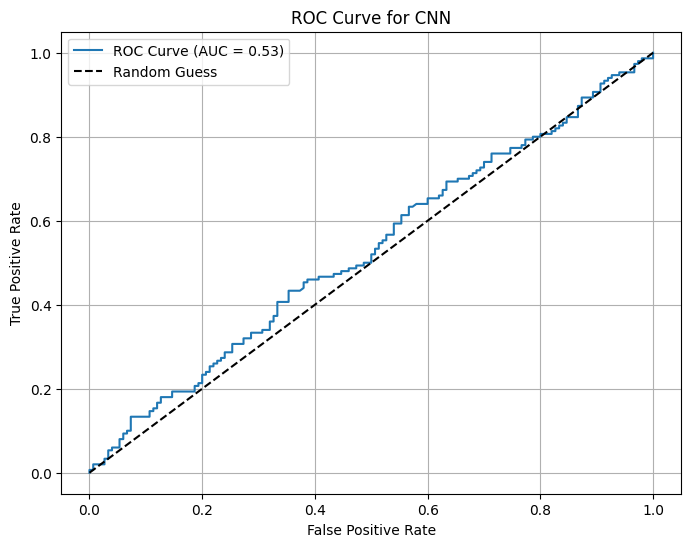

In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

# Load the dataset with embeddings
file_path = './dataset_with_embeddings.csv'  # Adjust based on your setup
data = pd.read_csv(file_path)

# Separate features and labels
embedding_columns = [col for col in data.columns if col.startswith('embed_')]
X = data[embedding_columns].values
y = data['label'].values  # Adjust 'label' to your target column

# Encode labels if they are not numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshape input for CNN-LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define model builders
def build_cnn_lstm_model(input_dim, learning_rate, optimizer):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
        LSTM(units=64, return_sequences=False),
        # Dropout(0.4),
        Dense(units=32, activation='relu'),
        Dropout(0.3),
        Dense(units=8, activation='relu'),
        Dense(units=1, activation='sigmoid')  # For binary classification
    ])
    opt = Adam(learning_rate) if optimizer == "Adam" else SGD(learning_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameters
batch_sizes = [8, 64]
learning_rates = [0.001, 0.0001]
optimizers = ['Adam', 'SGD']

# Greedy search variables
best_batch_size = None
best_learning_rate = None
best_optimizer = None
best_accuracy = 0

# Greedy search: Step-by-step optimization
print("Starting greedy search...")


# Optimize batch size
for batch_size in batch_sizes:
    print(f"Testing batch_size={batch_size}")
    model = build_cnn_lstm_model(X_train_reshaped.shape[1], learning_rates[0], optimizers[0])  # Use defaults for other params
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=20, batch_size=batch_size, callbacks=[early_stopping], verbose=0)
    val_accuracy = model.evaluate(X_val_reshaped, y_val, verbose=0)[1]
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_batch_size = batch_size
print(f"Best batch_size: {best_batch_size}, Accuracy: {best_accuracy:.4f}")


best_accuracy = 0
# Optimize learning rate
for lr in learning_rates:
    print(f"Testing learning_rate={lr}")
    model = build_cnn_lstm_model(X_train_reshaped.shape[1], lr, optimizers[0])  # Use default optimizer
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=20, batch_size=best_batch_size, callbacks=[early_stopping], verbose=0)
    val_accuracy = model.evaluate(X_val_reshaped, y_val, verbose=0)[1]
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_learning_rate = lr
print(f"Best learning_rate: {best_learning_rate}, Accuracy: {best_accuracy:.4f}")


best_accuracy = 0
# Optimize optimizer
for opt in optimizers:
    print(f"Testing optimizer={opt}")
    model = build_cnn_lstm_model(X_train_reshaped.shape[1], best_learning_rate, opt)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=20, batch_size=best_batch_size, callbacks=[early_stopping], verbose=0)
    val_accuracy = model.evaluate(X_val_reshaped, y_val, verbose=0)[1]
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_optimizer = opt
print(f"Best optimizer: {best_optimizer}, Accuracy: {best_accuracy:.4f}")

# Final Evaluation
print("Final hyperparameters:")
print(f"Batch Size: {best_batch_size}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Optimizer: {best_optimizer}")


# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (validation loss in this case)
    factor=0.05,          # Factor by which the learning rate will be reduced
    patience=3,          # Number of epochs with no improvement to wait before reducing LR
    min_lr=best_learning_rate,         # Minimum learning rate
    verbose=1            # Print messages when LR is reduced
)



# Train and evaluate the final model
final_model = build_cnn_lstm_model(X_train_reshaped.shape[1], best_learning_rate, best_optimizer)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
final_model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=30, batch_size=best_batch_size, callbacks=[reduce_lr, early_stopping], verbose=1)

# Evaluate the model on the test set
test_accuracy, precision, recall, f1, roc_auc, y_pred_probs = evaluate_model(model, X_test_reshaped, y_test)

results = {}
# Store results
results[f'cnn-lstm, {best_learning_rate}, {best_optimizer}, BS={best_batch_size}'] = {
    "accuracy": test_accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
print(results[f'cnn-lstm, {best_learning_rate}, {best_optimizer}, BS={best_batch_size}'])

# Plot ROC curve
plot_roc(y_test, y_pred_probs, 'CNN')


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6825 - loss: 0.5441 - val_accuracy: 0.9071 - val_loss: 0.1981 - learning_rate: 0.0010
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9637 - loss: 0.1280 - val_accuracy: 0.9429 - val_loss: 0.1412 - learning_rate: 0.0010
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9922 - loss: 0.0473 - val_accuracy: 0.9286 - val_loss: 0.2464 - learning_rate: 0.0010
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9848 - loss: 0.0486 - val_accuracy: 0.9714 - val_loss: 0.1338 - learning_rate: 0.0010
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0268 - val_accuracy: 0.9500 - val_loss: 0.1567 - learning_rate: 0.0010
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.9357 - val_loss: 0.2317 - learning_rate: 0.0010
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9898 - loss: 0.0221 - val_accuracy: 0.9500 - v

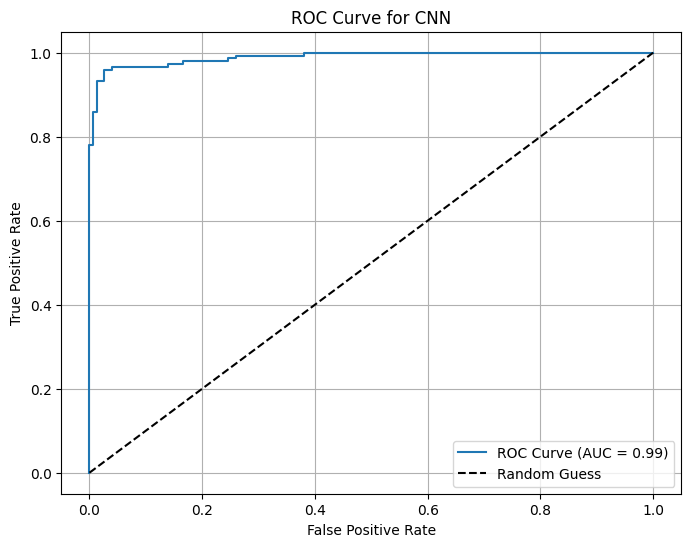

In [62]:
# CNN Model
def build_cnn_model(input_dim, learning_rate, optimizer):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
        Flatten(),
        Dense(units=32, activation='relu'),
        Dropout(0.3),
        Dense(units=8, activation='relu'),
        Dense(units=1, activation='sigmoid')  # For binary classification
    ])
    if optimizer == "Adam":
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == "SGD":
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer not supported!")
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model
def build_lstm_model(input_dim, learning_rate, optimizer):
    model = Sequential([
        LSTM(units=64, input_shape=(input_dim, 1), return_sequences=False),
        Dense(units=32, activation='relu'),
        Dropout(0.3),
        Dense(units=8, activation='relu'),
        Dense(units=1, activation='sigmoid')  # For binary classification
    ])
    if optimizer == "Adam":
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == "SGD":
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer not supported!")
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Build the model
model = build_cnn_model(X_train_reshaped.shape[1], 0.001, "Adam")

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (validation loss in this case)
    factor=0.05,          # Factor by which the learning rate will be reduced
    patience=3,          # Number of epochs with no improvement to wait before reducing LR
    min_lr=best_learning_rate,         # Minimum learning rate
    verbose=1            # Print messages when LR is reduced
)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_val_reshaped, y_val),
    epochs=30,
    batch_size=best_batch_size,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_accuracy, precision, recall, f1, roc_auc, y_pred_probs = evaluate_model(model, X_test_reshaped, y_test)

# Store results
results[f'cnn, {best_learning_rate}, {best_optimizer}, BS={best_batch_size}'] = {
    "accuracy": test_accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
print(results[f'cnn, {best_learning_rate}, {best_optimizer}, BS={best_batch_size}'])

# Plot ROC curve
plot_roc(y_test, y_pred_probs, 'CNN')


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4898 - loss: 0.6937 - val_accuracy: 0.4429 - val_loss: 0.6938 - learning_rate: 0.0010
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5065 - loss: 0.6933 - val_accuracy: 0.4571 - val_loss: 0.6953 - learning_rate: 0.0010
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4612 - loss: 0.6945 - val_accuracy: 0.4500 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5004 - loss: 0.6939 - val_accuracy: 0.4500 - val_loss: 0.6975 - learning_rate: 0.0010
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4777 - loss: 0.6933 - val_accuracy: 0.4929 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5122 - loss: 0.6923 - val_accuracy: 0.4357 - val_loss: 0.6957 - learning_rate: 0.0010
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4988 - loss: 0.6928 - val_accuracy: 0.4357 - v

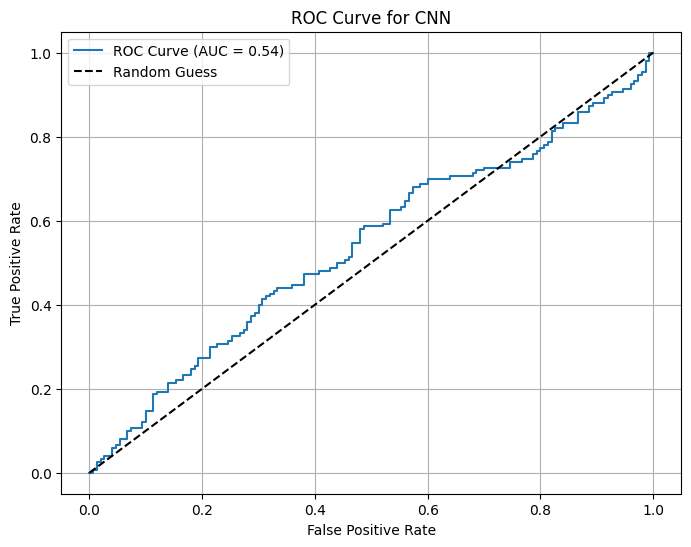

In [63]:
# Build the model
model = build_lstm_model(X_train_reshaped.shape[1], 0.001, "Adam")

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (validation loss in this case)
    factor=0.05,          # Factor by which the learning rate will be reduced
    patience=3,          # Number of epochs with no improvement to wait before reducing LR
    min_lr=best_learning_rate,         # Minimum learning rate
    verbose=1            # Print messages when LR is reduced
)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_val_reshaped, y_val),
    epochs=30,
    batch_size=best_batch_size,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_accuracy, precision, recall, f1, roc_auc, y_pred_probs = evaluate_model(model, X_test_reshaped, y_test)

# Store results
results[f'lstm, {best_learning_rate}, {best_optimizer}, BS={best_batch_size}'] = {
    "accuracy": test_accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
print(results[f'lstm, {best_learning_rate}, {best_optimizer}, BS={best_batch_size}'])

# Plot ROC curve
plot_roc(y_test, y_pred_probs, 'CNN')


In [64]:
results

{'cnn-lstm, 0.001, Adam, BS=8': {'accuracy': 0.52,
  'precision': 0.6071428571428571,
  'recall': 0.11333333333333333,
  'f1': 0.1910112359550562,
  'roc_auc': 0.5282222222222223},
 'cnn, 0.001, Adam, BS=8': {'accuracy': 0.9533333333333334,
  'precision': 0.9415584415584416,
  'recall': 0.9666666666666667,
  'f1': 0.9539473684210527,
  'roc_auc': 0.9895555555555555},
 'lstm, 0.001, Adam, BS=8': {'accuracy': 0.49,
  'precision': 0.49321266968325794,
  'recall': 0.7266666666666667,
  'f1': 0.5876010781671159,
  'roc_auc': 0.5386666666666667}}

In [ ]:
# Import libraries for Bag of Words and traditional models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load cleaned text dataset
file_path = './cleaned_dataset.csv'  # Adjust based on your setup
data = pd.read_csv(file_path)

# Extract features using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Limit vocabulary size to 1000 for simplicity
X_bow = vectorizer.fit_transform(data['cleaned_text']).toarray()
y = label_encoder.fit_transform(data['label'])  # Encode labels if not numeric

# Split dataset for traditional ML models
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.3, random_state=42)

# Define traditional models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

# Train and evaluate traditional models
ml_results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Train the model
    model.fit(X_train_bow, y_train_bow)
    
    # Predict probabilities and classes
    y_pred_probs = model.predict_proba(X_test_bow)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_bow)
    y_pred = model.predict(X_test_bow)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_bow, y_pred)
    precision = precision_score(y_test_bow, y_pred)
    recall = recall_score(y_test_bow, y_pred)
    f1 = f1_score(y_test_bow, y_pred)
    roc_auc = roc_auc_score(y_test_bow, y_pred_probs)
    
    # Store results
    ml_results[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc
    }


Results DataFrame:
                              accuracy  precision    recall        f1  \
cnn-lstm, 0.001, Adam, BS=64  0.506667   0.506667  0.506667  0.506667   
cnn, 0.001, Adam, BS=64       0.950000   0.953020  0.946667  0.949833   
lstm, 0.001, Adam, BS=64      0.486667   0.489474  0.620000  0.547059   
Logistic Regression           0.973333   0.986301  0.960000  0.972973   
Random Forest                 0.976667   0.961290  0.993333  0.977049   
SVM                           0.976667   0.979866  0.973333  0.976589   

                               roc_auc  
cnn-lstm, 0.001, Adam, BS=64  0.489156  
cnn, 0.001, Adam, BS=64       0.979822  
lstm, 0.001, Adam, BS=64      0.501156  
Logistic Regression           0.997689  
Random Forest                 0.998444  
SVM                           0.997556  


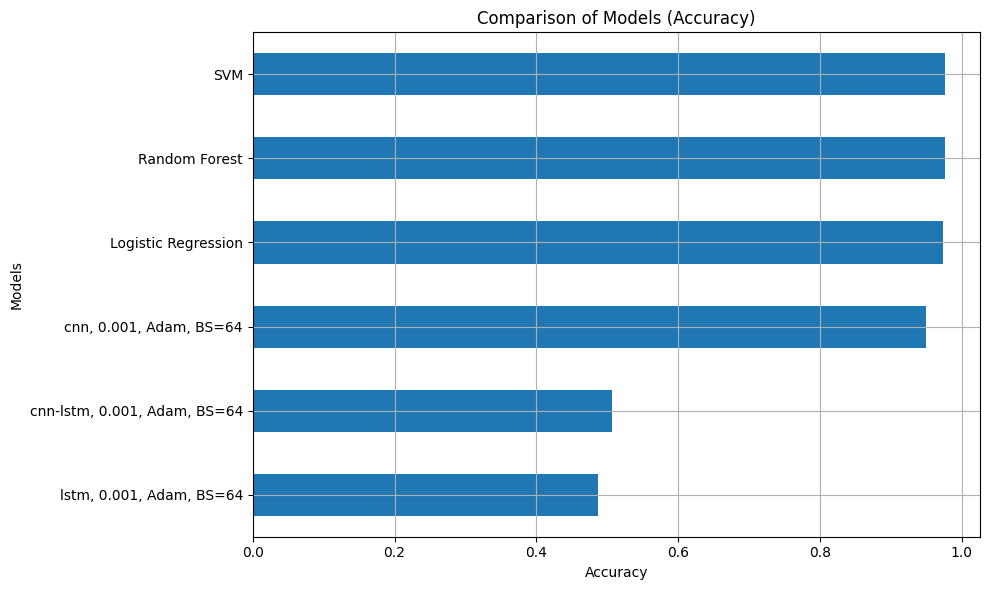

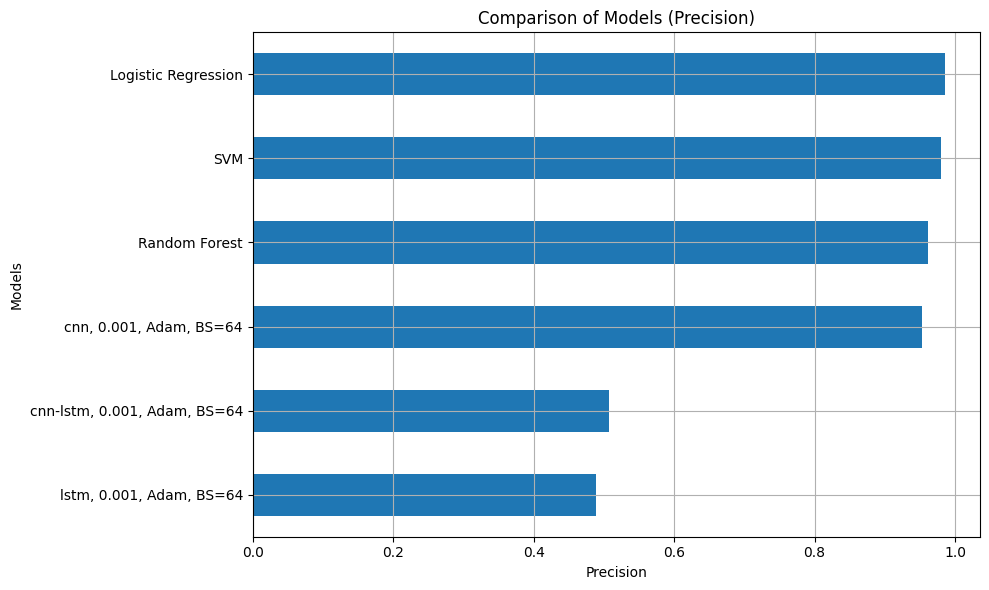

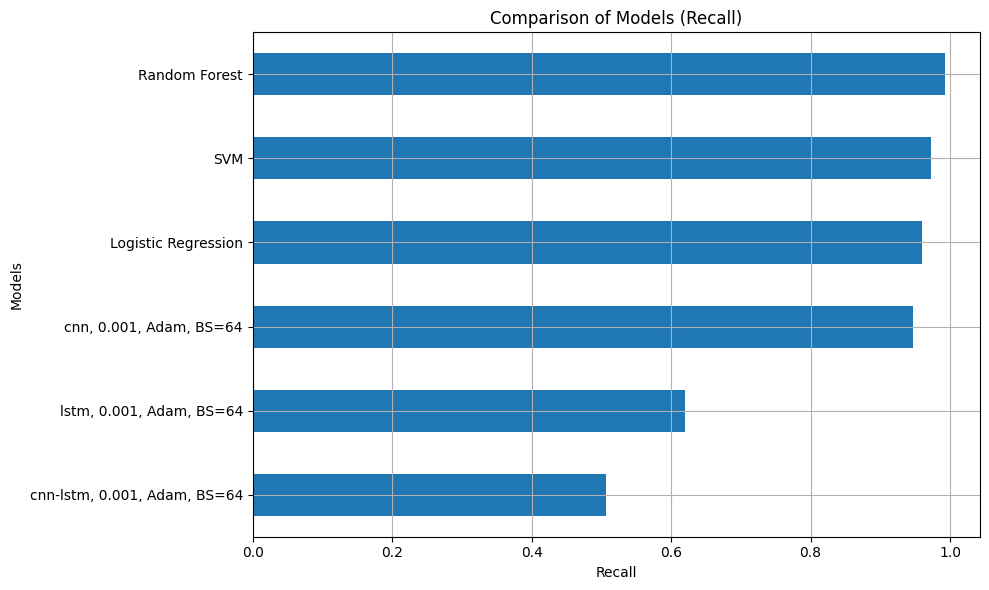

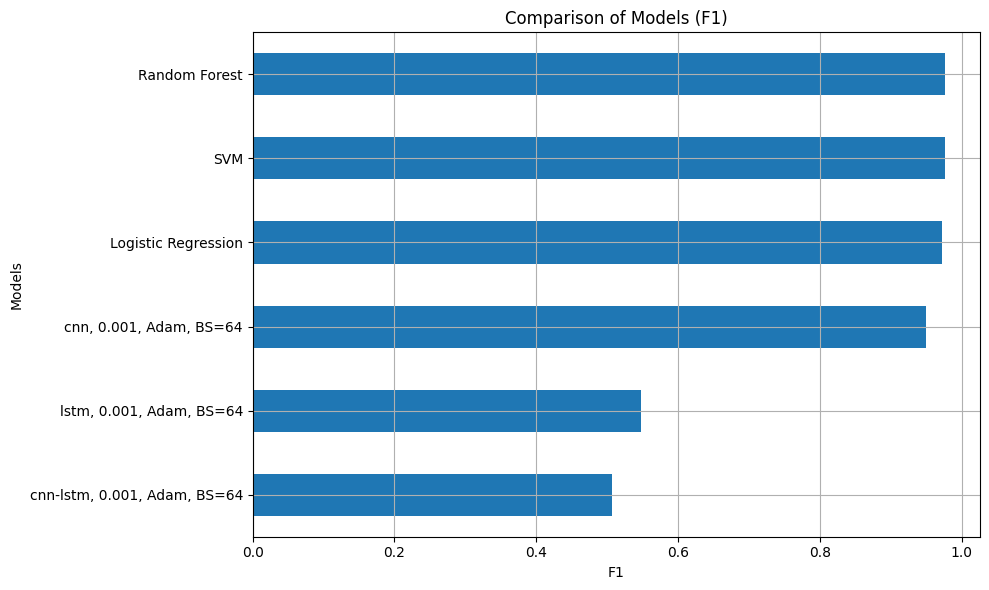

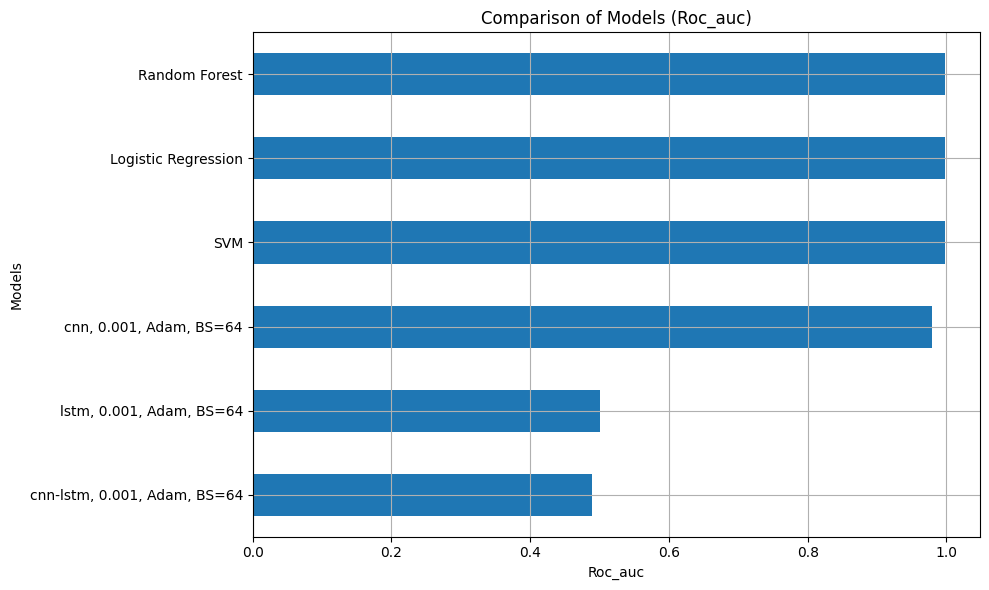

In [59]:
# Combine results
all_results = {**results, **ml_results}
results_df = pd.DataFrame(all_results).T

# Display the results
print("Results DataFrame:")
print(results_df)

# Plot each metric separately
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    results_df[metric].sort_values().plot(kind='barh', grid=True, title=f"Comparison of Models ({metric.capitalize()})")
    plt.xlabel(metric.capitalize())
    plt.ylabel('Models')
    plt.tight_layout()
    plt.show()